## Import Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

## Question 
Create a dataframe for the bending moment and shear force of the figure belows and draw the Shear force and bending moment diagram

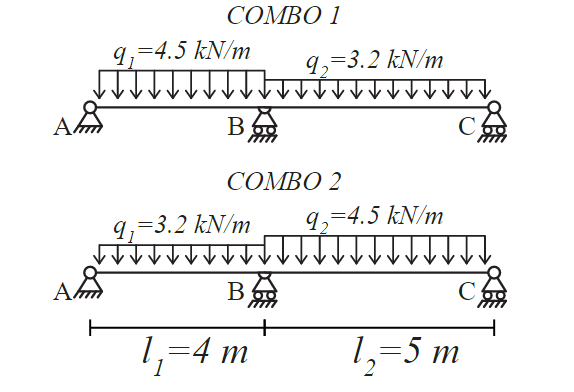

In [2]:
def beam(l1,l2,q1,q2):
    l = l1 + l2 #total length of beam 
    Mx = sp.symbols('Mx') 
    
    # Calculate Mx
    Mx = sp.solveset(Mx *l1/3 + q1 * l1**3/24 + Mx*l2/3 + q2 *l2**3/24, Mx).args[0]
    
    #solve equilibrium equations
    Ra,Rb1,Rb2,Rc = sp.symbols ('Ra Rb1 Rb2 Rc')
    Ra, Rb1 = sp.linsolve([Ra + Rb1- q1*l1, Rb1 *l1 +Mx - (q1 *l1**2)/2], (Ra,Rb1)).args[0] #span1
    Rc,Rb2 = sp.linsolve([Rb2 + Rc - q2*l2, Rb2*l2+Mx - (q2 *l2**2)/2], (Rc,Rb2)).args[0] #span2
    Rb = Rb1 +Rb2
    
    x1 = np.arange(0,l1+0.1,0.1) # axis x1 along beam length
    x2 = np.arange (0,l2+0.1,0.1) # axis x1 along beam length
    
    #Storing information in dataframe
    beam1 = pd.DataFrame({"x" :x1})
    beam2 = pd.DataFrame({"x" :x2})
    -
    #calculating M and storing
    beam1["M"] = Ra*beam1.x - (q1*beam1.x**2)/2  #M for beam 1 calculated and stored
    beam2["M"] = Mx-(q2*beam2.x**2)/2+ Rb2*beam2.x #M for beam 2 calculated and stored
    
    #calculating shear force and storing in DataFrame
    beam1["V"] = Ra - q1 *beam1.x 
    beam2["V"] = Rb2 - q2 *beam2.x 
    
    # updating the length of span 2
    beam2.x = beam2.x + l1 
    
    #combining the two dataframes into 1
    beam = pd.concat([beam1,beam2])
    
    return (beam)

## Solving the beam for the two load cases

In [3]:
#Creating header
header = pd.MultiIndex.from_tuples([("Combi 1", "M"), ("Combi 1", "V"),("Combi 2", "M"), ("Combi 2", "V")])
combos = pd.DataFrame (columns = header)
#display(combos)
combos["x"] = beam(4, 5, 3.2, 4.5)["x"]
#display(combos)
combos["Combi 1"] = beam(4, 5, 3.2, 4.5)
combos["Combi 2"] = beam(4, 5, 4.5, 3.2)

combos=combos.set_index("x")
combos=combos.astype("float")
combos.head()
display(combos.tail())

Combi 1             Combi 2          
            M         V         M         V
x                                          
8.6  3.287444 -7.318611  2.179556 -4.808889
8.7  2.533083 -7.768611  1.682667 -5.128889
8.8  1.733722 -8.218611  1.153778 -5.448889
8.9  0.889361 -8.668611  0.592889 -5.768889
9.0  0.000000 -9.118611  0.000000 -6.088889

## Plotting the results 

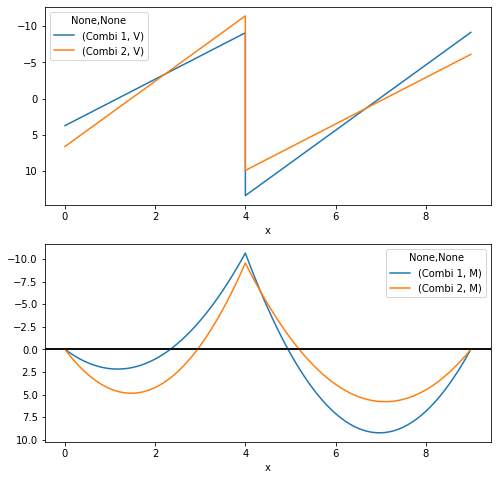

In [4]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(211)
ax.invert_yaxis()
combos.loc[:,pd.IndexSlice[:,"V"]].plot(ax=ax) 

ax = plt.subplot(212)
plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
ax.invert_yaxis()
combos.loc[:,pd.IndexSlice[:,"M"]].plot(ax=ax)
plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')